## Question 1:
## Submitted by: Sayan Chakraborty, EE18MTECH11030

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
from random import randint

### The K-means algorithm is defined as follows:

In [2]:
# class K_means():
def initialize(X_data, centroids):
    X_data = np.transpose(np.array(X_data))         # X_data argument is expected to have dimension in rows and number of observation in coloumns
    centroids = np.transpose(np.array(centroids))   # centroids argument is expected to have dimension in rows
    N = X_data.shape[0]    
    X_data = np.append(X_data, np.transpose(np.zeros((1,N))), axis=1)
    return X_data, centroids

def assign_cluster(X_data, centroids):
    X_data = X_data.copy() # to avoid mutability 
    N, M = X_data.shape    # N = num. of observations, M = dimension of data
    Nc, Mc = centroids.shape # Nc = num. of centroids, Mc = dimension of data
    dum_var = np.zeros(Nc)
    
    for i in range(N):
        dum_var = np.zeros(Nc)
        for j in range(Nc):
            dum_var[j] = (np.linalg.norm(X_data[i, 0:M-1] - centroids[j,:]))
        X_data[i,M-1] = np.argmin(dum_var)
                      
    return X_data

def update_centroids(X_data, centroids):
    centroids = centroids.copy() # to avoid mutability 
    X_data = X_data.copy()       # to avoid mutability 
    
    X_data = pd.DataFrame(X_data)
    centroids = pd.DataFrame(centroids) 
    N, M = X_data.shape    # N = num. of observations, M = dimension of data
    Nc, Mc = centroids.shape # Nc = num. of centroids, Mc = dimension of data
    X_data = X_data.rename(columns = {M-1:'cluster'})
#     print(X_data)
     
    
    for i in range(Nc):
        dum = X_data[X_data['cluster'] == i]
        dum = dum[dum.columns[0:X_data.shape[1]-1]]    
#         print(dum)
        if dum.shape[0] != 0:
            centroids.loc[i, :] = dum.sum(axis=0)/dum.shape[0]
        else:
            centroids.loc[i, :] = 0
            
#     print(centroids)
    return np.array(centroids)

### Generate Data:

In [3]:
def generate_data(k):
    ##### --------------------------------------------------------------- #####
    
    # Set three centers, the model should predict similar results
    center_1 = np.array([0,5])
    center_2 = np.array([-1,2])
    center_3 = np.array([1,1])
    center_4 = np.array([2,-2])
    center_5 = np.array([-10,-1])


    # Generate random data and center it to the three centers
    data_pts = 10000
    data_1 = np.random.randn(data_pts, 2) + center_1
    data_2 = np.random.randn(data_pts,2) + center_2
    data_3 = np.random.randn(data_pts,2) + center_3
    data_4 = np.random.randn(data_pts,2) + center_4
    data_5 = np.random.randn(data_pts,2) + center_5


    data = np.concatenate((data_1, data_2, data_3, data_4, data_5), axis = 0)
    centers = np.array([center_1, center_2, center_3, center_4, center_5])
    
    plt.figure(figsize=(20, 10))
    plt.scatter(data[:,0], data[:,1], s=7)
    plt.scatter(centers[:,0], centers[:,1], marker='.', c='r', s=150, label = 'centroids')
    plt.legend(fontsize=20)
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    
    return data
    
    ##### --------------------------------------------------------------- #####
    
    ##### --------------------------------------------------------------- #####
    
#     c = 5
#     data, y = make_blobs(n_samples=200, centers=c, n_features=2,random_state=0)   
#     color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#              for i in range(K)]

#     plt.figure(figsize=(20, 10))
#     for i in range(5):
#         Aa = data[y == i]
#         plt.scatter(Aa[:,0], Aa[:,1], marker='.', c= color[i] , s=150)
#     return data, y

    ##### --------------------------------------------------------------- #####

### Implement the K-means algorithm:

iteration 0 , error = 33.24987921432711
iteration 1 , error = 7.97402921720631
iteration 2 , error = 7.057862353918857
iteration 3 , error = 1.4177151786665845
iteration 4 , error = 0.7109930029387554
iteration 5 , error = 0.5548928815954357
iteration 6 , error = 0.5778530832869109
iteration 7 , error = 0.6589246857513223
iteration 8 , error = 0.712629982038226
iteration 9 , error = 0.6912658894452575
iteration 10 , error = 0.5762152824074258
iteration 11 , error = 0.412933804835967
iteration 12 , error = 0.2839370826357923
iteration 13 , error = 0.1745468862940909
iteration 14 , error = 0.11282739488436026
iteration 15 , error = 0.06912816027330962
iteration 16 , error = 0.0414487277747157
iteration 17 , error = 0.025758536620503265
iteration 18 , error = 0.01760107479071361
iteration 19 , error = 0.012064577342858023
iteration 20 , error = 0.008605845629359017
iteration 21 , error = 0.005639253385542119
iteration 22 , error = 0.003737768940942055
iteration 23 , error = 0.002175462627

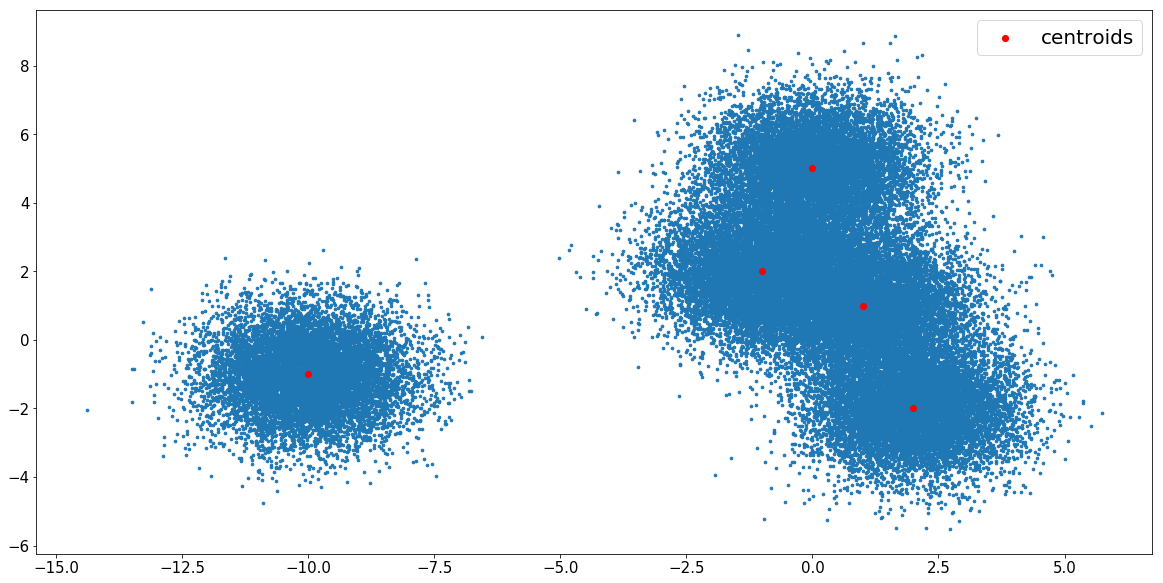

In [4]:
K = 5                     # number of centroids
X_data = generate_data(K) # generate data
X_data = X_data.transpose()
epsilon = 0.00001
centroids = np.array([ [1,2], [3,4], [5,6], [7,8], [9,10]])
# centroids = np.random.random()*np.array([[0,0],[-12,2],[1,10], [2,-2], [-10,-1]])

centroids = centroids.transpose()
error = 10
iter = 0
X_data, centroids = initialize(X_data, centroids)
N, M = X_data.shape    # N = num. of observations, M = dimension of data
while error > epsilon:
    
    X_data1 = assign_cluster(X_data, centroids)
    
    centroids_new = update_centroids(X_data1, centroids)

    error = np.sqrt(np.square(centroids-centroids_new).sum(axis=1)).sum()
    
    centroids = centroids_new
    
    print('iteration',iter, ', error =', error)
    iter += 1    
print(centroids)

### View results:

#### The clusters are not explicitly displsyed here to maintain neatness. However, the clusters with their corresponding centroids are plotted for visualizations as follows:

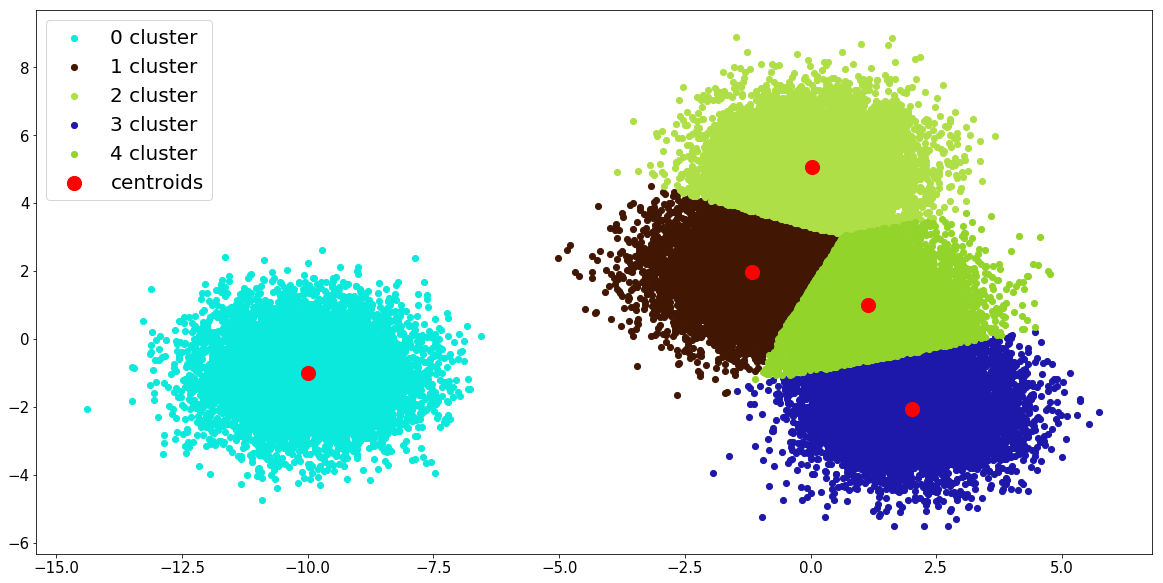

In [5]:
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(K)]

X_data1 = pd.DataFrame(X_data1)
X_data1 = X_data1.rename(columns = {M-1:'cluster'})
centroids = pd.DataFrame(centroids)
# print(X_data)
plt.figure(figsize=(20, 10))
for i in range(K):
    Aa = X_data1[X_data1['cluster'] == i]
    plt.scatter(Aa.loc[:,0], Aa.loc[:,1], marker='.', c= color[i] , s=150, label='%s cluster' % i)
plt.legend(fontsize=20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)

plt.scatter(centroids.loc[:,0], centroids.loc[:,1], marker='o', c= 'r' , s=200, label = 'centroids')
plt.legend(fontsize=20)